   Unnamed: 0  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0           0   0  18393       1     168    62.0    110     80            0   
1           1   1  20228       0     156    85.0    140     90            2   
2           2   2  18857       0     165    64.0    130     70            2   
3           3   3  17623       1     169    82.0    150    100            0   
4           4   4  17474       0     156    56.0    100     60            0   

   gluc  smoke  alco  active  cardio  
0     0      0     0       1       0  
1     0      0     0       1       1  
2     0      0     0       0       1  
3     0      0     0       1       1  
4     0      0     0       0       0  
Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
Confusion Matrix:
[[8483 1978]
 [3775 67

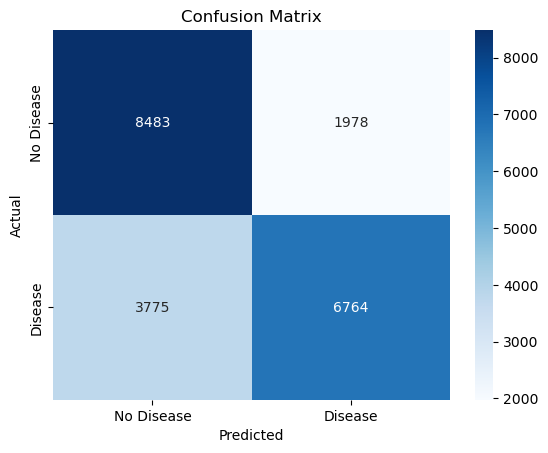

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.724 total time=  53.9s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.720 total time=  52.2s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.718 total time=  54.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.716 total time= 1.2min
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.716 total time= 1.9min
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.687 total time= 1.6min
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.688 total time= 1.6min
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.695 total time= 1.6min
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.682 total time= 1.7min
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.689 total time= 1.7min
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.652 total time= 1.2min
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (replace 'cardio_dataset.csv' with the path to your dataset)
df = pd.read_csv('C:/Users/festu/Downloads/Cardiovascular (2).csv')

# View basic information about the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or handle as necessary)
df.dropna(inplace=True)

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['cardio'])  # Assuming 'cardio' is the target column
y = df['cardio']

# Standardize the features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear')  # You can experiment with different kernels such as 'rbf', 'poly', etc.

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

# Fit the model
grid.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Score from GridSearchCV:", grid.best_score_)

# Evaluate the model with best parameters
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix (Tuned Model):")
print(conf_matrix_best)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (Tuned Model): {accuracy_best:.2f}")

print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_best))

# Visualize the confusion matrix for the tuned model
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()
